In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import keplergl
#from keplergl import KeplerGL
import matplotlib as plt
import plotly.express as px
import h3
import shapely
from geopandas import GeoDataFrame,GeoSeries
import folium
import matplotlib
%matplotlib inline

/Users/rakeenahmed/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Ontario Road Network

In [2]:
road_network = gpd.read_file('Ontario_Road_Network_(ORN)_Segment_With_Address (1).geojson')

In [3]:
#convert column names to lowercase
road_network.columns = [s.strip().lower() for s in road_network.columns]

In [4]:
road_network.shape

(607277, 38)

In [5]:
road_network.columns

Index(['ogf_id', 'official_street_name', 'abbreviated_street_name',
       'alternate_street_name', 'directional_prefix', 'street_type_prefix',
       'street_name_body', 'street_type_suffix', 'directional_suffix',
       'road_class', 'road_element_type', 'l_first_house_number',
       'l_last_house_number', 'l_house_number_structure',
       'l_original_municipality', 'l_standard_municipality',
       'r_first_house_number', 'r_last_house_number',
       'r_house_number_structure', 'r_original_municipality',
       'r_standard_municipality', 'direction_of_traffic_flow', 'route_name_1',
       'route_name_2', 'route_name_3', 'route_name_4', 'route_number_1',
       'route_number_2', 'route_number_3', 'shield_type', 'length',
       'geometry_update_datetime', 'effective_datetime', 'system_datetime',
       'objectid', 'shapelen', 'shape', 'geometry'],
      dtype='object')

In [6]:
#filter only toronto roads
road_network = road_network[road_network['r_standard_municipality'] == 'City of Toronto']

In [7]:
#check dataframe shape of remaining rows
road_network.shape

(50066, 38)

In [8]:
road_network.official_street_name.duplicated().sum()

37584

In [9]:
#dropping unneccessary columns

#specifying columns to keep
cols_to_keep = ['ogf_id','official_street_name','road_class','geometry']

#dropping columns
road_network = road_network[cols_to_keep]

In [10]:
#setting ogf_id as index
road_network.set_index('ogf_id',inplace=True)

In [11]:
road_network.head()

,official_street_name,road_class,geometry
ogf_id,,,
1944002730,JOHN TABOR TRAIL,Collector,"LINESTRING (-79.20635 43.80700, -79.20645 43.8..."
1946982966,HILLCREST AVENUE,Local / Street,"LINESTRING (-79.40732 43.76861, -79.40474 43.7..."
1947046424,KINGSTON ROAD,Arterial,"LINESTRING (-79.25200 43.70537, -79.25138 43.7..."
1946927270,IAN MACDONALD BOULEVARD,Local / Strata,"LINESTRING (-79.49831 43.77091, -79.49836 43.7..."
1947065928,SARGENT LANE,Local / Street,"LINESTRING (-79.29759 43.68485, -79.29664 43.6..."


In [12]:
#extracting latitude and longitude values from the linestring centroids
#road_network['latitude'] = road_network.apply(lambda x: x.geometry.centroid.coords[0][1], axis=1)
#road_network['longitude'] = road_network.apply(lambda x: x.geometry.centroid.coords[0][0], axis=1)

In [14]:
#combining latitude and longitudes to form coordinates column
#road_network['coordinates'] = road_network.apply(lambda x: (x.latitude, x.longitude), axis=1)

#create hex cells for bike lanes

#create coordinate column
#pedestrian_crossover_exploded['coordinates'] = pedestrian_crossover_exploded['latitude'].astype('str') + ',' + pedestrian_crossover_exploded['longitude'].astype('str')

#then we define the function to get h3 hex cells from coordinates data
#def get_hex_cell(coordinates):
    #a = float(coordinates.split(',')[0])
    #b = float(coordinates.split(',')[1])
    a = coordinates[0]
    b = coordinates[1]
    return h3.latlng_to_cell(a,b,res=10)

#finally, create a new column for hex cells by applying the function on coordinates column
#road_network['hex_cell'] = road_network['coordinates'].apply(get_hex_cell)

IndentationError: unexpected indent (2329637911.py, line 13)

In [15]:
road_network.head()

,official_street_name,road_class,geometry
ogf_id,,,
1944002730,JOHN TABOR TRAIL,Collector,"LINESTRING (-79.20635 43.80700, -79.20645 43.8..."
1946982966,HILLCREST AVENUE,Local / Street,"LINESTRING (-79.40732 43.76861, -79.40474 43.7..."
1947046424,KINGSTON ROAD,Arterial,"LINESTRING (-79.25200 43.70537, -79.25138 43.7..."
1946927270,IAN MACDONALD BOULEVARD,Local / Strata,"LINESTRING (-79.49831 43.77091, -79.49836 43.7..."
1947065928,SARGENT LANE,Local / Street,"LINESTRING (-79.29759 43.68485, -79.29664 43.6..."


In [16]:
road_network.to_csv('ontario_road_network_processed.csv')

In [17]:
road_network.to_file('ontario_road_network_processed.geojson',driver='GeoJSON')

# Intersections

In [21]:
intersections = gpd.read_file('Centreline Intersection - 4326.geojson')

In [22]:
intersections.head()

,_id,INTERSECTION_ID,DATE_EFFECTIVE,DATE_EXPIRY,ELEVATION_ID,INTERSECTION_DESC,CLASSIFICATION,CLASSIFICATION_DESC,NUMBER_OF_ELEVATIONS,ELEVATION_FEATURE_CODE,...,ELEVATION_LEVEL,ELEVATION,ELEVATION_UNIT,HEIGHT_RESTRICTION,HEIGHT_RESTRICTION_UNIT,STATE,TRANS_ID_CREATE,TRANS_ID_EXPIRE,OBJECTID,geometry
0,1,13470264,2008-12-12 04:22:46,3000-01-01T05:00:00,13,Robindale Ave / Rimilton Ave,MNRSL,Minor-Single Level,1,501300,...,0,0.0,None,0.0,None,8,200000,-1,1,MULTIPOINT (-79.53107 43.60724)
1,2,13470193,2008-12-12 04:22:46,3000-01-01T05:00:00,4718,Bellman Ave / Valermo Dr,MNRSL,Minor-Single Level,1,501300,...,0,0.0,None,0.0,None,8,200000,-1,4,MULTIPOINT (-79.53137 43.60960)
2,3,13470188,2008-12-12 04:22:46,3000-01-01T05:00:00,32728,Rimilton Ave / Valermo Dr,SEUSL,Pseudo Intersection-Single Level,1,509200,...,0,0.0,None,0.0,None,8,200000,-1,5,MULTIPOINT (-79.53012 43.60983)
3,4,13470203,2008-12-12 04:22:46,3000-01-01T05:00:00,21669,Valermo Dr / Goa Crt,MNRSL,Minor-Single Level,1,501300,...,0,0.0,None,0.0,None,8,200000,-1,7,MULTIPOINT (-79.53317 43.60919)
4,5,13470228,2008-12-12 04:22:46,3000-01-01T05:00:00,36820,Valermo Dr / Thirtieth St,MNRSL,Minor-Single Level,1,501300,...,0,0.0,None,0.0,None,8,200000,-1,9,MULTIPOINT (-79.53559 43.60864)


In [23]:
intersections.columns = [s.strip().lower() for s in intersections.columns]

In [24]:
intersections.columns

Index(['_id', 'intersection_id', 'date_effective', 'date_expiry',
       'elevation_id', 'intersection_desc', 'classification',
       'classification_desc', 'number_of_elevations', 'elevation_feature_code',
       'elevation_feature_code_desc', 'elevation_level', 'elevation',
       'elevation_unit', 'height_restriction', 'height_restriction_unit',
       'state', 'trans_id_create', 'trans_id_expire', 'objectid', 'geometry'],
      dtype='object')

In [25]:
#dropping unneccessary columns
cols_to_keep = ['intersection_id','intersection_desc','geometry']
intersections = intersections[cols_to_keep]

In [26]:
#set intersection_id as id index
#intersections.set_index('intersection_id',inplace=True)      

In [27]:
intersections.head()

,intersection_id,intersection_desc,geometry
0,13470264,Robindale Ave / Rimilton Ave,MULTIPOINT (-79.53107 43.60724)
1,13470193,Bellman Ave / Valermo Dr,MULTIPOINT (-79.53137 43.60960)
2,13470188,Rimilton Ave / Valermo Dr,MULTIPOINT (-79.53012 43.60983)
3,13470203,Valermo Dr / Goa Crt,MULTIPOINT (-79.53317 43.60919)
4,13470228,Valermo Dr / Thirtieth St,MULTIPOINT (-79.53559 43.60864)


In [29]:
#saving as geojson file
intersections.to_file('centreline_intersections_processed.geojson',driver='GeoJSON')

# Toronto Centreline

In [48]:
road_network = gpd.read_file('Centreline - Toronto.geojson')

In [49]:
road_network.head()

,_id,CENTRELINE_ID,LINEAR_NAME_ID,LINEAR_NAME_FULL,LINEAR_NAME_FULL_LEGAL,ADDRESS_L,ADDRESS_R,PARITY_L,PARITY_R,LO_NUM_L,...,TO_INTERSECTION_ID,ONEWAY_DIR_CODE,ONEWAY_DIR_CODE_DESC,FEATURE_CODE,FEATURE_CODE_DESC,JURISDICTION,CENTRELINE_STATUS,OBJECTID,MI_PRINX,geometry
0,1,914600,2141,Morrison St,Morrison Street,None,None,N,N,0,...,13470560,0,Not One-Way,201500,Local,CITY OF TORONTO,None,1,1,"MULTILINESTRING ((-79.50875 43.59744, -79.5098..."
1,2,914601,2666,Twelfth St,Twelfth Street,66-92,65-89,E,O,66,...,13470530,0,Not One-Way,201500,Local,CITY OF TORONTO,None,2,2,"MULTILINESTRING ((-79.50987 43.59720, -79.5103..."
2,3,7862398,2611,Thirteenth St,Thirteenth Street,66-96,65-91,E,O,66,...,13470538,0,Not One-Way,201500,Local,CITY OF TORONTO,None,3,3,"MULTILINESTRING ((-79.51087 43.59697, -79.5113..."
3,4,914587,1962,Lake Shore Blvd W,Lake Shore Boulevard West,None,3180-3180,N,E,0,...,13470552,0,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,6,6,"MULTILINESTRING ((-79.51805 43.59795, -79.5191..."
4,5,6735911,1962,Lake Shore Blvd W,Lake Shore Boulevard West,3197-3197,3190-3190,O,E,3197,...,13470558,0,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,7,7,"MULTILINESTRING ((-79.51914 43.59770, -79.5202..."


<AxesSubplot:>

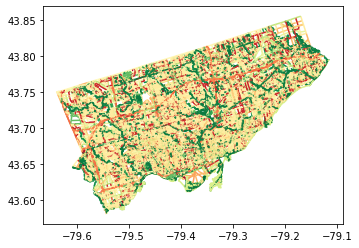

In [50]:
road_network.plot(column='FEATURE_CODE_DESC',cmap='RdYlGn')

In [51]:
road_network.shape

(70974, 41)

In [52]:
#converting column headers to lowercase
road_network.columns = [s.strip().lower() for s in road_network.columns]

In [53]:
road_network.columns

Index(['_id', 'centreline_id', 'linear_name_id', 'linear_name_full',
       'linear_name_full_legal', 'address_l', 'address_r', 'parity_l',
       'parity_r', 'lo_num_l', 'hi_num_l', 'lo_num_r', 'hi_num_r',
       'begin_addr_point_id_l', 'end_addr_point_id_l', 'begin_addr_point_id_r',
       'end_addr_point_id_r', 'begin_addr_l', 'end_addr_l', 'begin_addr_r',
       'end_addr_r', 'low_num_odd', 'high_num_odd', 'low_num_even',
       'high_num_even', 'linear_name', 'linear_name_type', 'linear_name_dir',
       'linear_name_desc', 'linear_name_label', 'from_intersection_id',
       'to_intersection_id', 'oneway_dir_code', 'oneway_dir_code_desc',
       'feature_code', 'feature_code_desc', 'jurisdiction',
       'centreline_status', 'objectid', 'mi_prinx', 'geometry'],
      dtype='object')

In [54]:
#dropping unneccesary columns
road_network = road_network[['centreline_id','linear_name_full_legal','linear_name_type','feature_code','feature_code_desc','geometry']]

In [55]:
#set centreline_id as id index
road_network.set_index('centreline_id',inplace=True)

In [59]:
road_network.head()

,linear_name_full_legal,linear_name_type,feature_code,feature_code_desc,geometry
centreline_id,,,,,
914600,Morrison Street,St,201500,Local,"MULTILINESTRING ((-79.50875 43.59744, -79.5098..."
914601,Twelfth Street,St,201500,Local,"MULTILINESTRING ((-79.50987 43.59720, -79.5103..."
7862398,Thirteenth Street,St,201500,Local,"MULTILINESTRING ((-79.51087 43.59697, -79.5113..."
914587,Lake Shore Boulevard West,Blvd,201200,Major Arterial,"MULTILINESTRING ((-79.51805 43.59795, -79.5191..."
6735911,Lake Shore Boulevard West,Blvd,201200,Major Arterial,"MULTILINESTRING ((-79.51914 43.59770, -79.5202..."


In [60]:
#making a list of road classes to keep
road_classes_to_keep = ['Local','Collector','Major Arterial','Minor Arterial','Expressway','Expressway Ramp','Pending','Major Arterial Ramp','Access Road','Busway','Collector Ramp','Other Ramp','Minor Arterial Ramp']

#filtering road network dataframe for road classes to keep
road_network = road_network[road_network['feature_code_desc'].isin(road_classes_to_keep)]

In [61]:
#checking shape of remaining dataframe
road_network.shape

(45184, 5)

In [62]:
road_network.head()

,linear_name_full_legal,linear_name_type,feature_code,feature_code_desc,geometry
centreline_id,,,,,
914600,Morrison Street,St,201500,Local,"MULTILINESTRING ((-79.50875 43.59744, -79.5098..."
914601,Twelfth Street,St,201500,Local,"MULTILINESTRING ((-79.50987 43.59720, -79.5103..."
7862398,Thirteenth Street,St,201500,Local,"MULTILINESTRING ((-79.51087 43.59697, -79.5113..."
914587,Lake Shore Boulevard West,Blvd,201200,Major Arterial,"MULTILINESTRING ((-79.51805 43.59795, -79.5191..."
6735911,Lake Shore Boulevard West,Blvd,201200,Major Arterial,"MULTILINESTRING ((-79.51914 43.59770, -79.5202..."


In [63]:
#saving dataframe as geojson file
road_network.to_file('road_network_processed.geojson',driver='GeoJSON')